# MDSTC-DBSCAN Demo

Data: https://data.ct.gov/Housing-and-Development/Real-Estate-Sales-2001-2020-GL/5mzw-sjtu

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from MDST_DBSCAN.MDSTC_DBSCAN.mdstc_dbscan import mdstcdbscan
from shapely.geometry import Polygon,MultiPoint, Point
from datetime import datetime
import numpy as np

In [ ]:
df = pd.read_csv(r'.\Data\realestatesales.csv')


In [3]:
df = df[df['Location'].notna()]
df

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
10,200086,2020,08/10/2021,Bethlehem,39 WOODLAND RD,168900.0,352000.0,0.479800,Residential,Single Family,NaN,NaN,NaN,POINT (-73.18197 41.64672)
53,200194,2020,02/05/2021,East Lyme,5 ROCCO DR,170660.0,220000.0,0.775700,Vacant Land,NaN,NaN,NaN,NaN,POINT (-72.22025 41.3942)
55,200320,2020,05/10/2021,East Lyme,9 FREEDOM WAY,776230.0,1525000.0,0.509000,Commercial,NaN,NaN,NaN,NaN,POINT (-72.24486 41.32183)
98,200639,2020,07/28/2021,Groton,4 TYLER AVE,259770.0,650000.0,0.399646,Residential,Single Family,NaN,NaN,NaN,POINT (-72.07229 41.32148)
100,200020,2020,10/06/2020,Groton,98 EAST SHORE AVE,654570.0,990000.0,0.661182,Residential,Single Family,07 - Change in Property,TEAR DOWN,NaN,POINT (-72.00446 41.31252)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997181,190389,2019,03/24/2020,Norwich,17 VINE ST,86600.0,182000.0,0.475800,Three Family,Three Family,NaN,NaN,NaN,POINT (-72.07006 41.53315)
997187,190478,2019,02/14/2020,Norwalk,38 HYATT AVE,283180.0,440000.0,0.643600,Single Family,Single Family,14 - Foreclosure,FORECLOSURE BY SALE: 1-7-9-0,NaN,POINT (-73.427 41.11112)
997192,190159,2019,07/23/2020,Weston,62 RIDGE ROAD,516990.0,790000.0,0.654400,Single Family,Single Family,NaN,NaN,NaN,POINT (-73.38341 41.19079)
997204,190105,2019,02/25/2020,Plymouth,18 OVERLOOK RD,104130.0,80000.0,1.301625,Single Family,Single Family,14 - Foreclosure,NaN,BANK SALE PER MLS,POINT (-72.98492 41.64753)


In [4]:
df['Date Recorded'] = pd.to_datetime(df['Date Recorded'])
filtered_df = df[(df['Date Recorded'].dt.year >= 2015) & (df['Date Recorded'].dt.year <= 2020)]

In [5]:
property_types = filtered_df['Property Type'].value_counts()
filtered_df = filtered_df[filtered_df['Property Type'] == 'Single Family']


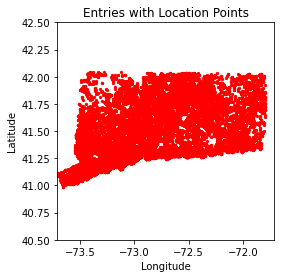

In [6]:
from shapely.wkt import loads

# Convert the WKT coordinates to Shapely Point objects
filtered_df['geometry'] = filtered_df['Location'].apply(loads)

# Create a GeoDataFrame from the DataFrame
gdf = gpd.GeoDataFrame(filtered_df, geometry='geometry')

center_point = loads('POINT(-72.71 41.5)')

# Plot the GeoDataFrame
fig, ax = plt.subplots()
gdf.plot(ax=ax, marker='o', color='red', markersize=5)

# Set axis labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Entries with Location Points')


ax.set_xlim(center_point.x - 1, center_point.x + 1)
ax.set_ylim(center_point.y - 1, center_point.y + 1)

# Display the plot
plt.show()

In [7]:
# Convert the 'geometry' column to a GeoSeries
gdf = gpd.GeoSeries(filtered_df['geometry'])

# Extract x and y coordinates
x = gdf.geometry.x
y = gdf.geometry.y
time = filtered_df['Date Recorded']
value = filtered_df['Sale Amount']
ids = filtered_df.index.values
ids = pd.Series(filtered_df.index.values)


In [8]:
eps = 0.2 #0.04
eps2 = 70000 #500
minpts = 300 #20
#eps=0.038, eps2=1000.0, minpts=110

model = mdstcdbscan(eps, eps2, minpts,1)
cluster_mark, df, reward, data = model.run(x, y, time, value, ids)



Cluster -1: 10401
Cluster 1: 3562
Cluster 2: 888
Cluster 3: 975
Cluster 4: 4339
Cluster 5: 2041
Cluster 6: 898
Cluster 7: 532
Cluster 8: 885
Cluster 9: 529
Cluster 10: 1144
Cluster 11: 932
Cluster 12: 940
Cluster 13: 399
Cluster 14: 621
Cluster 15: 552
Cluster 16: 975
Cluster 17: 312
Cluster 18: 354
Cluster 19: 317
Cluster 20: 375
Cluster 21: 333
Cluster 22: 311


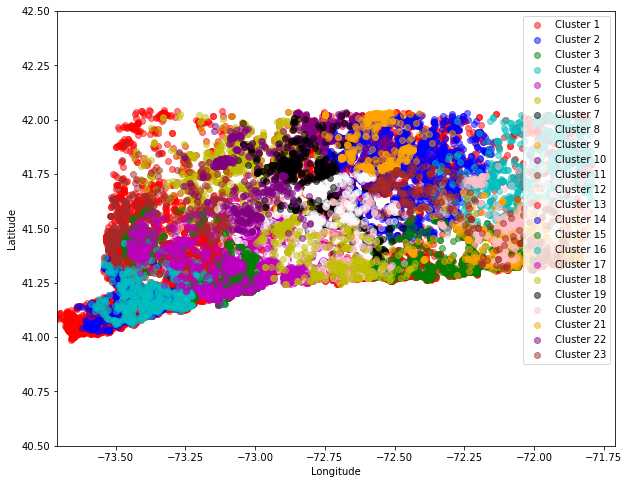

In [9]:
colors = ['r', 'b', 'g', 'c', 'm', 'y', 'k', 'pink', 'orange', 'purple', 'brown','w']

# Create figure and axes
labels, counts = np.unique(df['cluster_mark'], return_counts=True)
n_clusters = len(labels)

for i, label in enumerate(labels):
    print(f"Cluster {label}: {counts[i]}")
fig, ax = plt.subplots(figsize=(10, 8))

# Iterate over each cluster
for i in range(n_clusters):
    # Get indices of points in the current cluster
    idx = np.where(df['cluster_mark'] == labels[i])[0]

    # Get x and y values for the points in the current cluster
    y_plot = df['y'][idx]
    x_plot = df['x'][idx]
    # Plot the points with the appropriate color
    ax.scatter(x_plot, y_plot, c=colors[i % len(colors)], alpha=0.5, label=f'Cluster {i+1}')


# Set labels for the axes
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

center_point = loads('POINT(-72.71 41.5)')


ax.set_xlim(center_point.x - 1, center_point.x + 1)
ax.set_ylim(center_point.y - 1, center_point.y + 1)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.show()

##### Taking the major cluster mark of each location

In [10]:
count_df = df.groupby(['x', 'y', 'cluster_mark']).size().reset_index(name='count')
count_df
max_cluster_df = count_df.loc[count_df.groupby(['x', 'y'])['count'].idxmax()][['x', 'y', 'cluster_mark']]



In [11]:
count_df

,x,y,cluster_mark,count
0,-121.23091,40.30336,-1,1
1,-73.71476,41.08957,-1,1
2,-73.71403,41.09235,-1,1
3,-73.70779,41.08383,-1,1
4,-73.70366,41.10162,-1,1
...,...,...,...,...
30506,-71.79407,41.78952,-1,1
30507,-71.79397,41.69970,3,1
30508,-71.79335,41.81391,3,1
30509,-71.79247,41.74459,3,2


In [12]:
merged_df = df.merge(max_cluster_df, on=['x', 'y'], suffixes=('', '_max'))
merged_df

,id,x,y,time,value,cluster_mark,cluster_mark_max
0,698659,-72.44711,41.77055,18,190000.0,1,1
1,970742,-72.44787,41.63867,1809,265000.0,1,1
2,761121,-72.20420,41.31694,546,232750.0,2,2
3,957304,-72.13418,41.48260,1775,420000.0,22,22
4,856128,-72.72602,41.78638,1036,476000.0,18,18
...,...,...,...,...,...,...,...
32610,796726,-73.05762,41.31037,516,159000.0,4,4
32611,747663,-73.45412,41.07018,465,2900000.0,-1,-1
32612,934366,-72.92644,41.39299,2048,250000.0,4,4
32613,939467,-73.33781,41.84494,1977,750000.0,-1,-1


Cluster -1: 11306
Cluster 1: 3454
Cluster 2: 880
Cluster 3: 965
Cluster 4: 4460
Cluster 5: 2035
Cluster 6: 843
Cluster 7: 512
Cluster 8: 880
Cluster 9: 511
Cluster 10: 1128
Cluster 11: 756
Cluster 12: 926
Cluster 13: 380
Cluster 14: 574
Cluster 15: 504
Cluster 16: 790
Cluster 17: 281
Cluster 18: 333
Cluster 19: 225
Cluster 20: 319
Cluster 21: 259
Cluster 22: 294


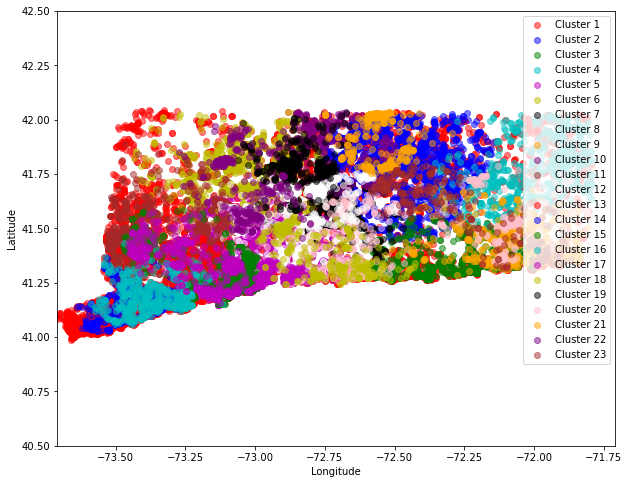

In [13]:
# Create figure and axes
labels, counts = np.unique(merged_df['cluster_mark_max'], return_counts=True)
n_clusters = len(labels)

for i, label in enumerate(labels):
    print(f"Cluster {label}: {counts[i]}")
fig, ax = plt.subplots(figsize=(10, 8))


# Iterate over each cluster
for i in range(n_clusters):
    # Get indices of points in the current cluster
    idx = np.where(merged_df['cluster_mark_max'] == labels[i])[0]

    # Get x and y values for the points in the current cluster
    y_plot = merged_df['y'][idx]
    x_plot = merged_df['x'][idx]
    # Plot the points with the appropriate color
    ax.scatter(x_plot, y_plot, c=colors[i % len(colors)], alpha=0.5, label=f'Cluster {i+1}')

# Set labels for the axes
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

center_point = loads('POINT(-72.71 41.5)')


ax.set_xlim(center_point.x - 1, center_point.x + 1)
ax.set_ylim(center_point.y - 1, center_point.y + 1)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.show()

#### Creating Convex Hulls

In [14]:
# Create a list of Point objects from x and y columns
points = [Point(y,x) for y,x in zip(merged_df['y'], merged_df['x'])]

# Create a GeoDataFrame from merged_df and points
gdf = gpd.GeoDataFrame(merged_df, geometry=points)

In [15]:

# Create a dictionary to hold the polygons for each cluster
polygons = {}

# Loop over the clusters and create a polygon for each one
for cluster in gdf.cluster_mark.unique():
    if cluster != -1:
        points = gdf[gdf.cluster_mark == cluster].geometry.to_list()
        if len(points) > 0:
            # Swap xmerged_df2['cluster1_max'] and y coordinates
            points = [(point.y, point.x) for point in points]
            # Create a convex hull around the points
            hull = MultiPoint(points).convex_hull
            polygons[cluster] = hull

# Create a new GeoDataFrame with the polygons
poly_gdf = gpd.GeoDataFrame(geometry=list(polygons.values()))



# Add the cluster labels to the GeoDataFrame
poly_gdf['cluster_mark_max'] = list(polygons.keys())
poly_gdf


,geometry,cluster_mark_max
0,"POLYGON ((-72.46430 41.44499, -72.51209 41.452...",1
1,"POLYGON ((-72.51111 41.25898, -72.56957 41.276...",2
2,"POLYGON ((-72.00572 41.30990, -72.11163 41.315...",22
3,"POLYGON ((-72.85852 41.58382, -72.90884 41.590...",18
4,"POLYGON ((-73.13280 41.14790, -73.20703 41.185...",4
5,"POLYGON ((-73.27708 41.23496, -73.34850 41.238...",10
6,"POLYGON ((-72.17051 41.51453, -72.23200 41.536...",3
7,"POLYGON ((-72.12914 41.34757, -72.14369 41.347...",19
8,"POLYGON ((-72.90990 41.59602, -72.96397 41.609...",9
9,"POLYGON ((-72.83064 41.45490, -73.01671 41.481...",21


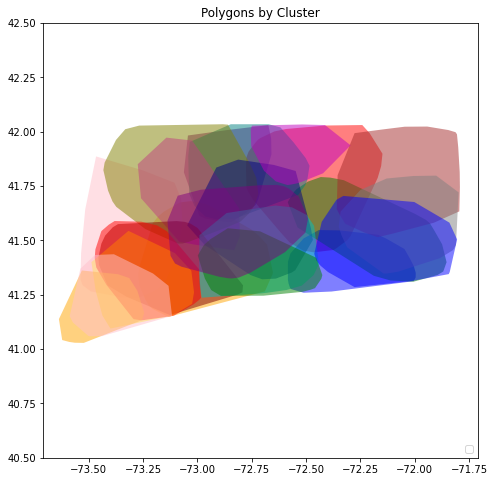

In [16]:
colors = ['red', 'blue', 'green', 'purple', 'orange', 'pink', 'brown', 'grey', 'teal', 'magenta', 'olive', 'navy', 'maroon','yellow','c','m']
#colors = ['r', 'b', 'g', 'c', 'm', 'y', 'k', 'pink', 'orange', 'purple', 'brown','w']

# Set the plot style and plot the polygons
#style_kwds = {'border': 'gray', 'linewidth': 1.5, 'edgecolor': 'black'}
fig, ax = plt.subplots(figsize=(12, 8))

for i, cluster in enumerate(polygons.keys()):
    poly_gdf[poly_gdf.cluster_mark_max == cluster].plot(ax=ax,color=colors[i % len(colors)], alpha=0.5,label=f'Cluster {i+1}')

    
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='lower right')

center_point = loads('POINT(-72.71 41.5)')


ax.set_xlim(center_point.x - 1, center_point.x + 1)
ax.set_ylim(center_point.y - 1, center_point.y + 1)


ax.set_title('Polygons by Cluster')
ax.set_aspect('equal')
plt.show()